# Import knihoven

In [382]:
import csv
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
np.set_printoptions(precision=3)
from sympy import *
from scipy.stats import norm, uniform, expon, t
from scipy.optimize import minimize
import statsmodels
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import norm, expon, uniform

# Načtení datasetu
Dataset jsme exportovali z R do "my_data.csv"

In [383]:
df = pd.read_csv('my_data.csv', sep = ";", decimal = ",")

# 1
(1b) Načtěte datový soubor a rozdělte sledovanou proměnnou na příslušné dvě pozorované skupiny. Stručně popište data a zkoumaný problém. Pro každou skupinu zvlášť odhadněte střední hodnotu, rozptyl a medián příslušného rozdělení.

Zobrazení prvních 5 záznamů.

In [384]:
display(df.head())

,Lifetime,Group
0,18,control
1,36,control
2,50,control
3,52,control
4,86,control


Základní informace o datasetu.

In [385]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Lifetime  122 non-null    int64 
 1   Group     122 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.0+ KB


None

Zobrazení unikátních záznamů sloupce "Lifetime" pomocí příkazu unique:

In [386]:
display(df['Lifetime'].unique())

array([ 18,  36,  50,  52,  86,  87,  89,  91, 102, 108, 114, 115, 118,
       119, 120, 149, 160, 165, 166, 167, 173, 178, 189, 209, 212, 216,
       273, 278, 279, 292, 341, 355, 367, 380, 382, 421, 432, 446, 455,
       463, 474, 505, 545, 546, 569, 576, 590, 603, 607, 608, 621, 634,
       637, 638, 641, 650, 663, 685, 688, 725, 735,  76,  93,  97, 107,
       113, 136, 138, 139, 152, 154, 164, 168, 179, 181, 183, 185, 194,
       198, 213, 220, 225, 244, 253, 256, 259, 265, 268, 270, 283, 289,
       291, 311, 315, 326, 361, 373, 376, 397, 398, 406, 459, 466, 592,
       598])

Zobrazení typů skupin.

In [387]:
display(df['Group'].unique())

array(['control', 'bacilli'], dtype=object)

Nyní jsme si připravili tři funkce na výpočet aritmetického průměru (np.mean()), rozptylu (np.var()) a mediánu (np.median()) a následně je aplikovali na data jednotlivých skupin.

In [388]:
def get_mean(a):
    return (np.mean(a))

In [389]:
def get_var(a):
    return (np.var(a))

In [390]:
def get_median(a):
    return (np.median(a))

In [391]:
control = df[df['Group'] ==  'control']
bacilli = df[df['Group'] ==  'bacilli']

#display(control.describe())
#display(bacilli.describe())

print(f"------Mean------")
control_mean = get_mean(control['Lifetime'])
print(f"E(control) = {control_mean:.5}")
bacilli_mean = get_mean(bacilli['Lifetime'])
print(f"E(bacilli) = {bacilli_mean:.5}")

print(f"\n------Var------")
control_var = get_var(control['Lifetime'])
print(f"var(control) = {control_var:.6}")
bacilli_var = get_var(bacilli['Lifetime'])
print(f"var(bacilli) = {bacilli_var:.6}")

print(f"\n------Median------")
control_median = get_median(control['Lifetime'])
print(f"Median(control) = {control_median}")
bacilli_median = get_median(bacilli['Lifetime'])
print(f"Median(bacilli) = {bacilli_median}")

------Mean------
E(control) = 345.23
E(bacilli) = 242.53

------Var------
var(control) = 48600.2
var(bacilli) = 13667.9

------Median------
Median(control) = 316.5
Median(bacilli) = 214.5


Základní informace o datasetu
Zkoumaný dataset obsahuje výsledky experimentu s morčaty. Daný dataet obsahuje dva sloupce:
* "Lifetime" - doba přežití (ve dnech)
* "Group" - přidělená skupina.

Morčata byla rozdělena do dvou skupin. První skupině  byl podán tubercle bacilli, druhá skupina sloužila jako kontrolní. Každá skupina obsahovala 122 subjektů.

Aritmetický průměr se vypočítá pomocí vzorce:
$$
\begin{align}
\widehat{EX} = \overset{\_}{X_{n}} = \frac{1}{n} \cdot \sum_{k = 1}^{n}{X_{k}}
\end{align}
$$

K odhadu rozptylu se používá vzorec:
$$
\begin{align}
\widehat{var(X)} = s_{n}^2 = \frac{1}{n - 1} \cdot \sum_{k = 1}^{n}({X_{k}} - \overset{\_}{X_{n}})^2
\end{align}
$$

Medián se vypočítá pomocí vzorce:
$$
\begin{equation}
median(X_{n})=
\begin{cases}
          x_{\lfloor\frac{n}{2}\rfloor}; \space n\ mod\ 2 = 1 \\
          \frac{x_{\frac{n - 2}{2}} + x_{\frac{n}{2}}}{2}; \space n\ mod\ 2 = 0 \\
     \end{cases}
\end{equation}
$$

Odhadem střední hodnoty skupiny "control" je hodnota 345.23, odhadem rozptylu je hodnota 48600.2 a mediánu odpovídá hodnota 316.5.

Odhadem střední hodnoty skupiny "bacilli" je hodnota 242.53, odhadem rozptylu je hodnota 13667.9 a mediánu odpovídá hodnota 214.5.



# 2
(1b) Pro každou skupinu zvlášť odhadněte hustotu a distribuční funkci pomocí histogramu a empirické distribuční funkce.

Definice funkcí na vykreslení požadovaných grafů.

In [392]:
def get_epiric_hist(a, title):
    Lifetime = ECDF(a['Lifetime'])
    plt.figure(figsize=(10,6))
    plt.plot(Lifetime.x, Lifetime.y)
    plt.title(title)
    plt.xlabel('Doba přežití (dny)')
    plt.ylabel('Pravděpodobnost')

In [393]:
def get_histogram(df):
    #Určíme interval, počet přehrádek a přehrádky
    ox_interval = np.linspace(df.min(), df.max())

    #Optimální počet přehrádek byl zvolen takový:
    breaks = 12
    bins_survived = np.linspace(round(df.min()), df.max(), breaks + 1)

    #Výsledný histogram
    plt.figure(figsize=(20,10))
    plt.title('Histogram doby přežití')
    plt.xlabel('Doba přežití (dny)')
    plt.ylabel('Hustota')
    plt.hist(df, bins_survived, density=True)

    plt.show()

In [394]:
def get_hist(a, title):
    a.plot(kind = 'hist', title = title, figsize=(10,6), xlabel = 'Lifetime')

Vykreslení grafů pro obě skupiny dohromady.

<AxesSubplot:title={'center':'Hustota skóre skupiny '}, ylabel='Density'>

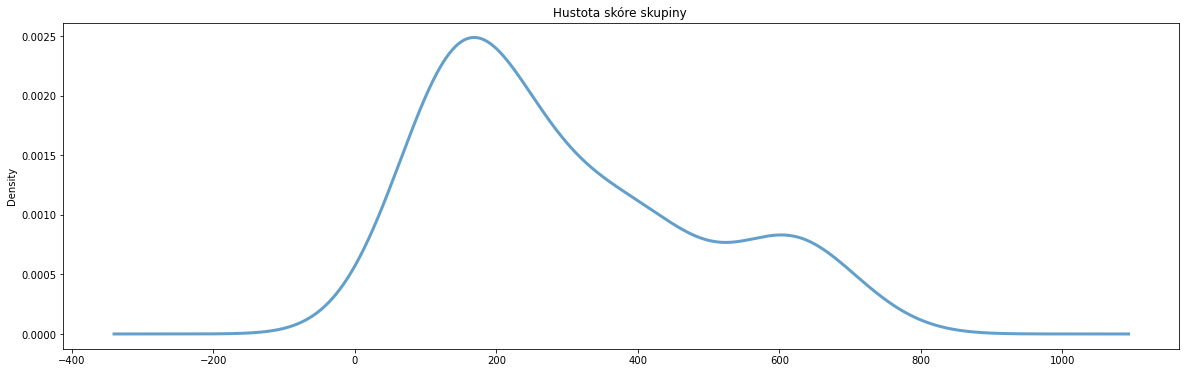

In [395]:
df['Lifetime'].plot.density(title = f"Hustota skóre skupiny ", linewidth = 3, alpha = 0.7, figsize=(20,6))

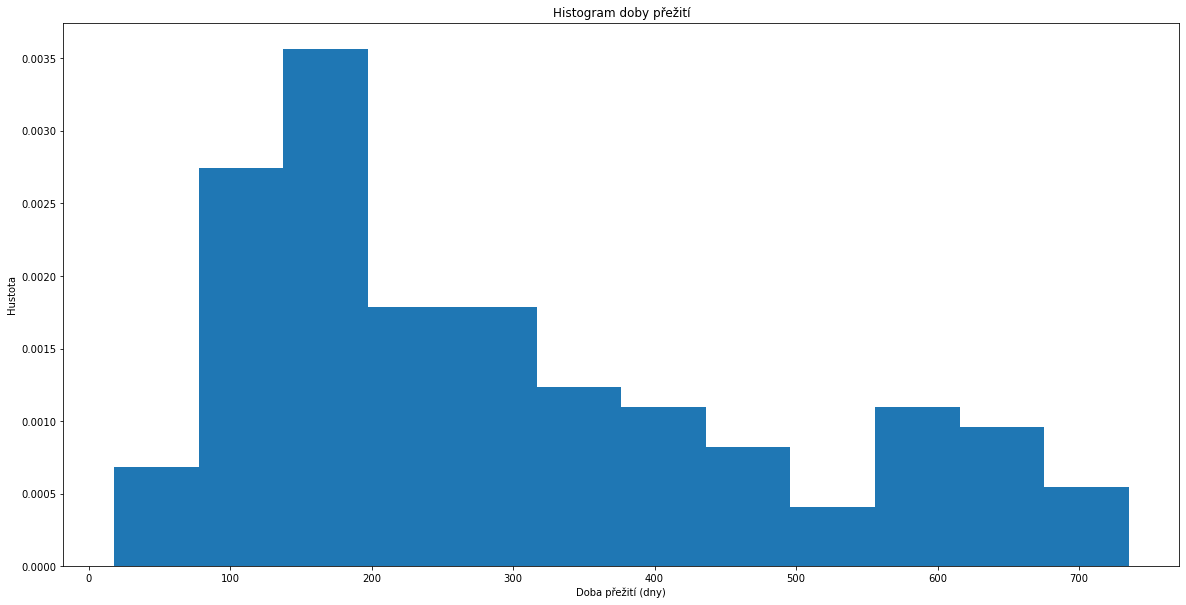

In [396]:
get_histogram(df['Lifetime'])

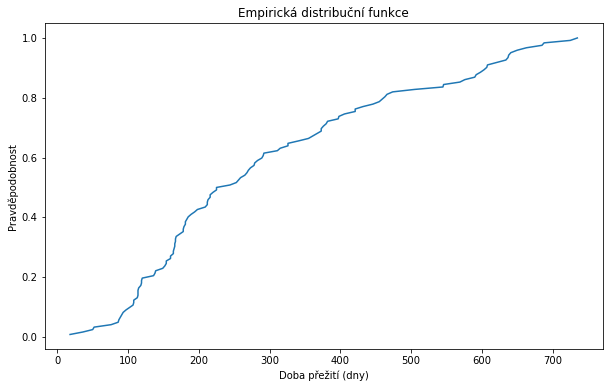

In [397]:
get_epiric_hist(df, "Empirická distribuční funkce")

Vykreslení grafů pro skupinu "control".

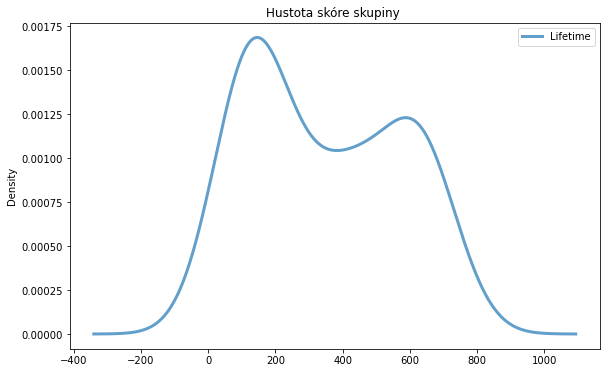

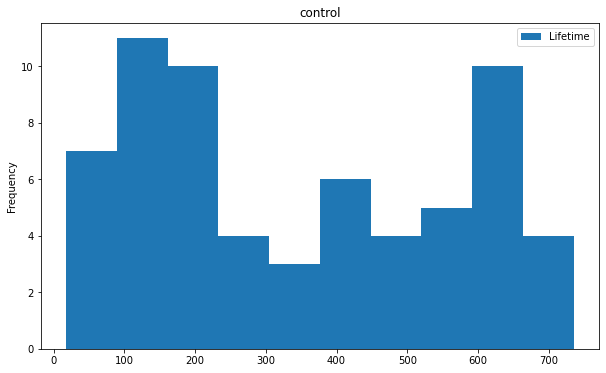

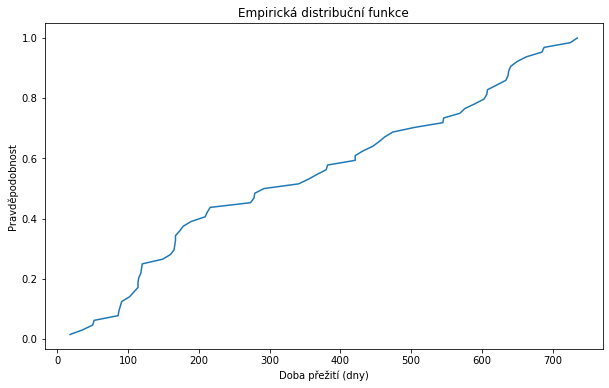

In [398]:
control.plot.density(title = f"Hustota skóre skupiny ", linewidth = 3, alpha = 0.7, figsize=(9.5,6))
get_hist(control, "control")
get_epiric_hist(control, "Empirická distribuční funkce")

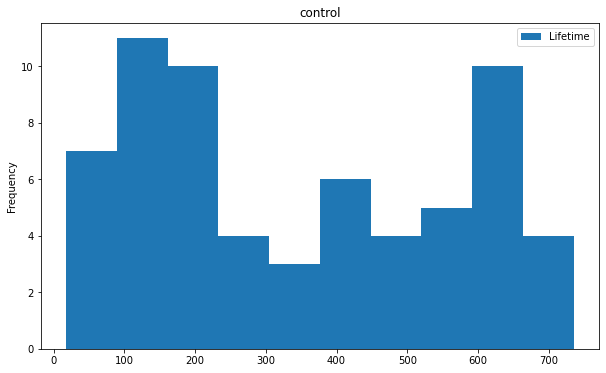

In [399]:
get_hist(control, "control")

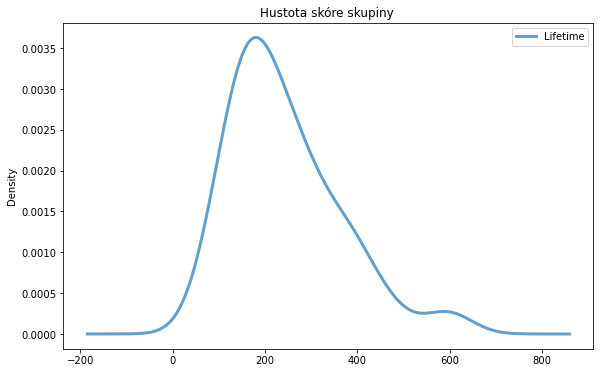

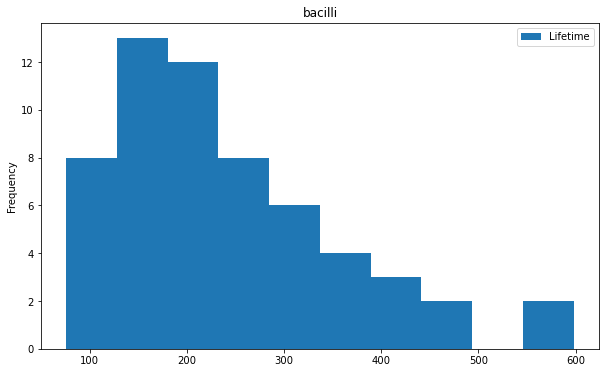

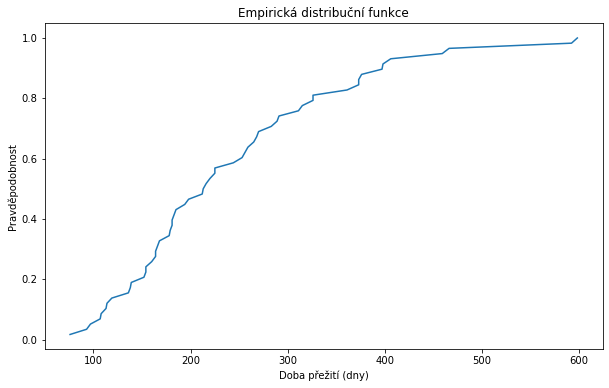

In [400]:
bacilli.plot.density(title = f"Hustota skóre skupiny ", linewidth = 3, alpha = 0.7, figsize=(9.5,6))
get_hist(bacilli, "bacilli")
get_epiric_hist(bacilli, "Empirická distribuční funkce")

# 3
(3b) Pro každou skupinu zvlášť najděte nejbližší rozdělení: Odhadněte parametry normálního, exponenciálního a rovnoměrného rozdělení. Zaneste příslušné hustoty s odhadnutými parametry do grafů histogramu. Diskutujte, které z rozdělení odpovídá pozorovaným datům nejlépe.


Pro jednotlivé skupiny jsme si vykreslili distribuční funkci doby přežití, exponencionální, rovnoměrné a normální rozdělení. Vhodné parametry (střední hodnota, směrodatná odchylka) pro daná rozdělení jsme nalezli pomocí funkcí (expon.fit(), uniform.fit() a norm.fit()) z knihovny scipy.

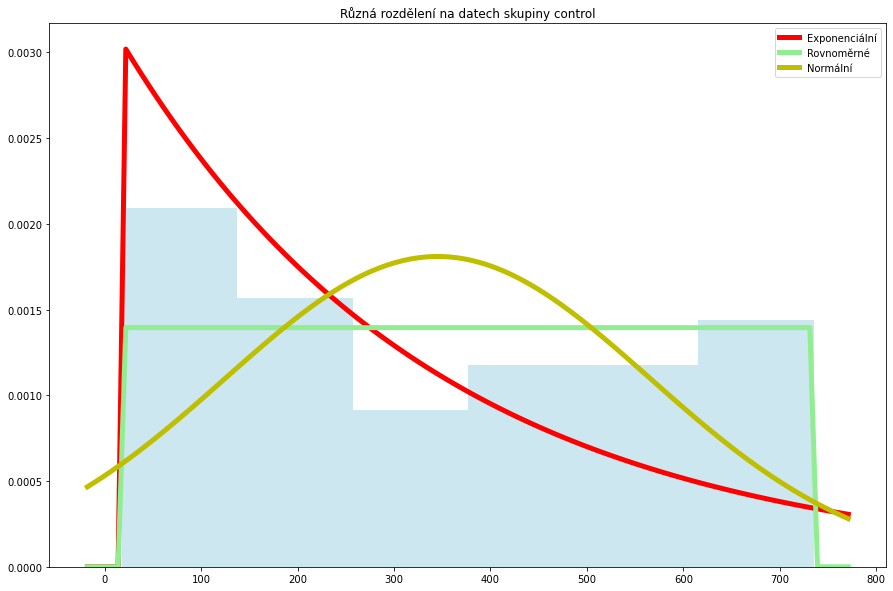

In [401]:
#Exponenciální rozdělení
a1, b1 = expon.fit(control['Lifetime'])
ff1, ax1 = plt.subplots(figsize=(15,10))
ax1.hist(control["Lifetime"], bins=6, density=True, alpha=0.6, color='lightblue')
xmin1, xmax1 = plt.xlim()
x1 = np.linspace(xmin, xmax, 100)
p1 = expon.pdf(x1, a1, b1)
ax1.plot(x1, p1, 'r', linewidth=5, label="Exponenciální")

#Uniformní rozdělení
c1, d1 = uniform.fit(control["Lifetime"])  
p2 = uniform.pdf(x1, c1, d1)
ax1.plot(x1, p2, 'lightgreen', linewidth=5, label="Rovnoměrné")

#Normální rozdělení
e1, f1 = norm.fit(control["Lifetime"])
p3 = norm.pdf(x1, e1, f1)
ax1.plot(x1, p3, 'y', linewidth=5, label="Normální")
ax1.set_title("Různá rozdělení na datech skupiny control")
ax1.legend()

In [402]:
#Námi spočítaná střední hodnota a směrodatná odchylka 
print(f"E(control) = {control_mean}, směrodatná odchylka = {np.sqrt(control_var)}")

#Odhadnuté hodnoty
print(f"Exponencionální rozdělení: EX = {a1}, směrodatná odchylka = {b1}")
print(f"Rovnoměrné rozdělení: EX = {c1}, směrodatná odchylka = {d1}")
print(f"Normální rozdělení: EX = {e1}, směrodatná odchylka = {f1}")

E(control) = 345.234375, směrodatná odchylka = 220.4546255884856
Exponencionální rozdělení: EX = 18.0, směrodatná odchylka = 327.234375
Rovnoměrné rozdělení: EX = 18.0, směrodatná odchylka = 717.0
Normální rozdělení: EX = 345.234375, směrodatná odchylka = 220.4546255884856


Z porovnání odhadnutých středních hodnot a směrodatných odchylek s námi dříve vypočítanými hodnotami vyplývá, že rozdělení doby přežití morčat skupiny "normal" je normální.

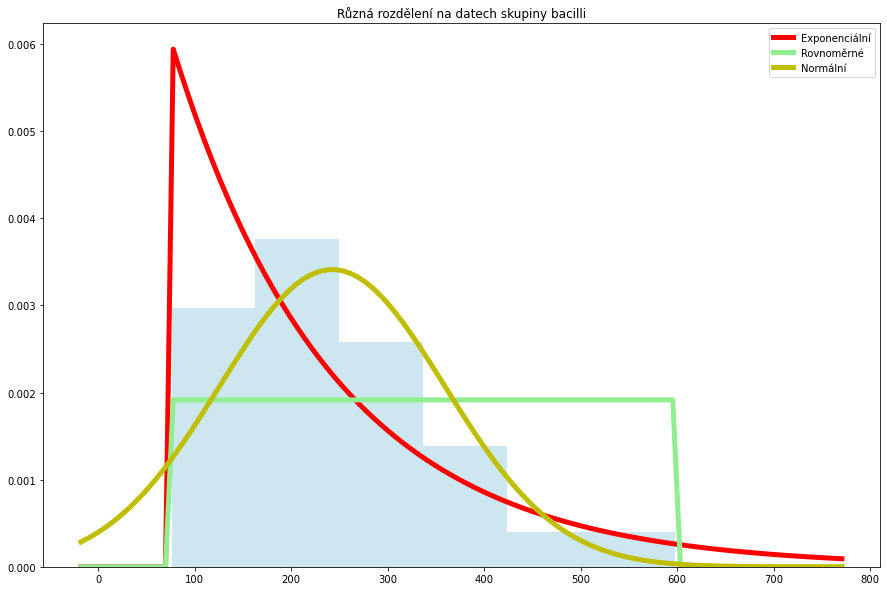

In [403]:
ff1, ax1 = plt.subplots(figsize=(15,10))
ax1.hist(bacilli["Lifetime"], bins=6, density=True, alpha=0.6, color='lightblue')
xmin1, xmax1 = plt.xlim()
x1 = np.linspace(xmin, xmax, 100)

#Exponenciální rozdělení
a1, b1 = expon.fit(bacilli['Lifetime'])
p1 = expon.pdf(x1, a1, b1)
ax1.plot(x1, p1, 'r', linewidth=5, label="Exponenciální")

#Uniformní rozdělení
c1, d1 = uniform.fit(bacilli["Lifetime"])  
p2 = uniform.pdf(x1, c1, d1)
ax1.plot(x1, p2, 'lightgreen', linewidth=5, label="Rovnoměrné")

#Normální rozdělení
e1, f1 = norm.fit(bacilli["Lifetime"])
p3 = norm.pdf(x1, e1, f1)
ax1.plot(x1, p3, 'y', linewidth=5, label="Normální")
ax1.set_title("Různá rozdělení na datech skupiny bacilli")
ax1.legend()

In [404]:
#Námi spočítaná střední hodnota a směrodatná odchylka 
print(f"E(bacilli) = {bacilli_mean}, směrodatná odchylka = {np.sqrt(bacilli_var)}")

#Odhadnuté hodnoty
print(f"Exponencionální rozdělení: EX = {a1}, směrodatná odchylka = {b1}")
print(f"Rovnoměrné rozdělení: EX = {c1}, směrodatná odchylka = {d1}")
print(f"Normální rozdělení: EX = {e1}, směrodatná odchylka = {f1}")

E(bacilli) = 242.5344827586207, směrodatná odchylka = 116.90981132203214
Exponencionální rozdělení: EX = 76.0, směrodatná odchylka = 166.5344827586207
Rovnoměrné rozdělení: EX = 76.0, směrodatná odchylka = 522.0
Normální rozdělení: EX = 242.5344827586207, směrodatná odchylka = 116.90981132203213


Z porovnání odhadnutých středních hodnot a směrodatných odchylek s námi dříve vypočítanými hodnotami vyplývá, že rozdělení doby přežití morčat skupiny "bacilli" je normální. 

# 4
(1b) Pro každou skupinu zvlášť vygenerujte náhodný výběr o 100 hodnotách z rozdělení, které jste zvolili jako nejbližší, s parametry odhadnutými v předchozím bodě. Porovnejte histogram simulovaných hodnot s pozorovanými daty.

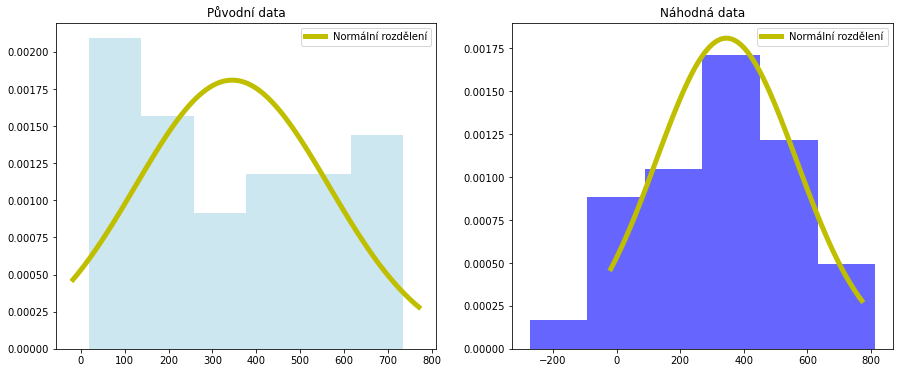

In [405]:
ff1, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
ax1.hist(control["Lifetime"], bins=6, density=True, alpha=0.6, color='lightblue')
xmin1, xmax1 = plt.xlim()
x1 = np.linspace(xmin, xmax, 100)

#Normální rozdělení
e1, f1 = norm.fit(control["Lifetime"])
p3 = norm.pdf(x1, e1, f1)
ax1.plot(x1, p3, 'y', linewidth=5, label="Normální rozdělení")
ax1.set_title("Původní data")
ax1.legend()

s = np.random.normal(e1, f1, 100)

ax2.hist(s, bins=6, density=True, alpha=0.6, color='blue')

p4 = norm.pdf(x1, e1, f1)
ax2.plot(x1, p4, 'y', linewidth=5, label="Normální rozdělení")

ax2.set_title(f"Náhodná data")
ax2.legend()

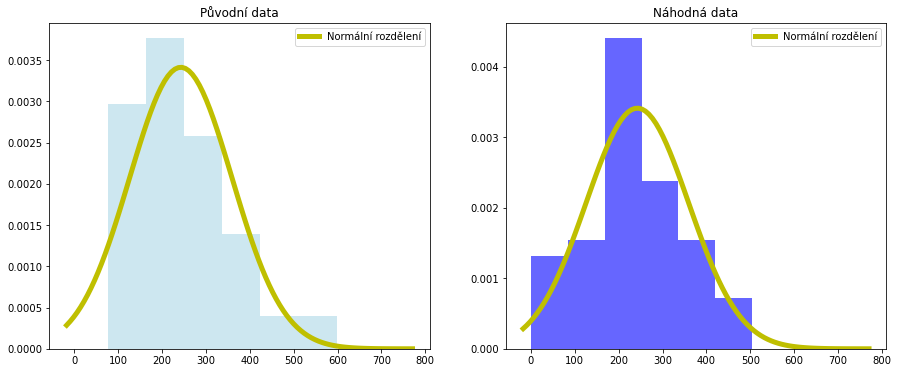

In [406]:
ff1, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
ax1.hist(bacilli["Lifetime"], bins=6, density=True, alpha=0.6, color='lightblue')
xmin1, xmax1 = plt.xlim()
x1 = np.linspace(xmin, xmax, 100)

#Normální rozdělení
e1, f1 = norm.fit(bacilli["Lifetime"])
p3 = norm.pdf(x1, e1, f1)
ax1.plot(x1, p3, 'y', linewidth=5, label="Normální rozdělení")
ax1.set_title("Původní data")
ax1.legend()

s = np.random.normal(e1, f1, 100)

ax2.hist(s, bins=6, density=True, alpha=0.6, color='blue')

p4 = norm.pdf(x1, e1, f1)
ax2.plot(x1, p4, 'y', linewidth=5, label="Normální rozdělení")

ax2.set_title(f"Náhodná data")
ax2.legend()

Po náhodném výběru dat z datasetu a jejich následném porovnání s původnímy, jsme si potvrdili, že rozdělení je normální. U skupiny "control" na původním histogramu nebylo jednoznačně patrné, že se jedná o normální rozdělení. V případě náhodných dat tvar histogramu "kopíruje" křivku normálního rozdělení.

# 5
(1b) Pro každou skupinu zvlášť spočítejte oboustranný 95% konfidenční interval pro střední hodnotu.

In [407]:
# n = 60, aplha = 0.05
t = 1.671
cnt = control.count()
print(f"Počet morčat ve skupině control: n = {cnt.unique()[0]}, aplha = 0.05 => t = 1.671")
x_control = (control_mean - ((t * (control_var ** 0.5)) / (cnt ** 0.5)))
y_control = (control_mean + ((t * (control_var ** 0.5)) / (cnt ** 0.5)))

tmp = x_control.unique()
x_control = tmp[0]
tmp = y_control.unique()
y_control = tmp[0]

# n = 55, aplha = 0.05
t = 1.673
cnt2 = bacilli.count()
print(f"Počet morčat ve skupině bacilli: n = {cnt2.unique()[0]}, aplha = 0.05 => t = 1.673")
x_bacilli = (bacilli_mean - ((t * (bacilli_var ** 0.5)) / (cnt2 ** 0.5)))
y_bacilli = (bacilli_mean + ((t * (bacilli_var ** 0.5)) / (cnt2 ** 0.5)))

tmp = x_bacilli.unique()
x_bacilli = tmp[0]
tmp = y_bacilli.unique()
y_bacilli = tmp[0]

print(f'Oboustranný 95% konfidenční interval pro střední hodnotu (control): [{x_control:.5}, {y_control:.5}], EX = {control_mean:.5}')
print(f'Oboustranný 95% konfidenční interval pro střední hodnotu (bacilli): [{x_bacilli:.5}, {y_bacilli:.5}], EX = {bacilli_mean:.5}')

Počet morčat ve skupině control: n = 64, aplha = 0.05 => t = 1.671
Počet morčat ve skupině bacilli: n = 58, aplha = 0.05 => t = 1.673
Oboustranný 95% konfidenční interval pro střední hodnotu (control): [299.19, 391.28], EX = 345.23
Oboustranný 95% konfidenční interval pro střední hodnotu (bacilli): [216.85, 268.22], EX = 242.53


**t** se spočítá ze studentova rozdělení:

$$
\begin{align}
\left( \overset{\_}{X_{n}} - \frac{t_{n-1}\left(\frac{\alpha}{2}\right) \cdot s}{\sqrt{n}}, \overset{\_}{X_{n}} + \frac{t_{n-1}\left(\frac{\alpha}{2}\right) \cdot s}{\sqrt{n}} \right)
\end{align}
$$

# 6
(1b) Pro každou skupinu zvlášť otestujte na hladině významnosti 5 % hypotézu, zda je střední hodnota rovná hodnotě K (parametr úlohy), proti oboustranné alternativě. Můžete použít buď výsledek z předešlého bodu, nebo výstup z příslušné vestavěné funkce vašeho softwaru. <br>
   
   * H0: u = K
   * Ha: u != K
   * aplha = 0.05 <br>
*Jelikož máme počítat na hladině významnosti 5 %, můžeme využít oboustranné konfidenční intervaly z minulé úlohy (1 - 0.95 = 0.05)*

In [408]:
K = df['Lifetime'].mean()
print(f"Střední hodnota K (Lifetime) = {K:.5}")
print("Oboustranné intervaly jsou vzaty z minulé úlohy (5):")
print(f"Control: [{x_control:.5}, {y_control:.5}] -> K({K:.5}) nespadá do konfidenčního intervalu -> zamitáme H0.")
print(f"Bacilli: [{x_bacilli:.5}, {y_bacilli:.5}] -> K({K:.5}) nespadá do konfidenčního intervalu -> zamitáme H0.")

Střední hodnota K (Lifetime) = 296.41
Oboustranné intervaly jsou vzaty z minulé úlohy (5):
Control: [299.19, 391.28] -> K(296.41) nespadá do konfidenčního intervalu -> zamitáme H0.
Bacilli: [216.85, 268.22] -> K(296.41) nespadá do konfidenčního intervalu -> zamitáme H0.


# 7
(2b) Na hladině významnosti 5 % otestujte, jestli mají pozorované skupiny stejnou střední hodnotu. Typ testu a alternativy stanovte tak, aby vaše volba nejlépe korespondovala s povahou zkoumaného problému.

In [411]:
print("Bohužel nezbyl čas ani energie.")

Bohužel nezbyl čas ani energie.
